# Problem 1

In [2]:
import sympy as sy
from matplotlib import pyplot as plt
import math 
from sympy import *
import numpy as np

In [16]:
def get_prime():
    x = sy.symbols('x')
    f_prime=sy.diff(pow((sin(x)+1),sin(cos(x))),x)
    f = lambdify(x, f_prime, 'numpy')
    return f


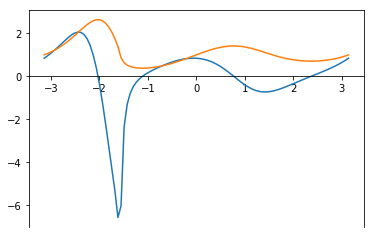

In [25]:
x = np.linspace(-np.pi, np.pi, 100)
ax = plt.gca()
f = get_prime()
ax.spines["bottom"].set_position("zero")
ax.plot(x, f(x))
ax.plot(x, (np.sin(x) + 1) ** np.sin(np.cos(x)))
plt.show()

# Problem 2

In [14]:
def forward1(f, x, h):
    return (f(x+h)-f(x))/h

def forward2(f, x, h):
    return (-3*f(x)+4*f(x+h)-f(x+2*h))/(2*h)

def backward1(f, x, h):
    return (f(x)-f(x-h))/h

def backward2(f, x, h):
    return (3*f(x)-4*f(x-h)+f(x-2*h))/(2*h)

def center1(f, x, h):
    return (f(x+h)-f(x-h))/(2*h)

def center2(f, x, h):
    return (f(x-2*h)-8*f(x-h)+8*f(x+h)-f(x+2*h))/(12*h)

f = lambda x: (np.sin(x) + 1) ** np.sin(np.cos(x))
x = np.linspace(-np.pi, np.pi, 100)
h = 0.2


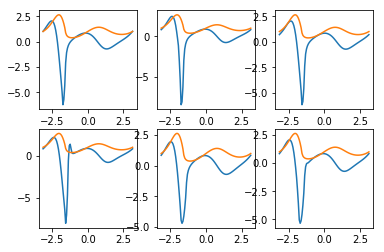

In [15]:
plt.subplot(231)
plt.plot(x, forward1(f, x, h))
plt.plot(x, (np.sin(x) + 1) ** np.sin(np.cos(x)))
plt.subplot(232)
plt.plot(x, forward2(f, x, h))
plt.plot(x, (np.sin(x) + 1) ** np.sin(np.cos(x)))
plt.subplot(233)
plt.plot(x, backward1(f, x, h))
plt.plot(x, (np.sin(x) + 1) ** np.sin(np.cos(x)))
plt.subplot(234)
plt.plot(x, backward2(f, x, h))
plt.plot(x, (np.sin(x) + 1) ** np.sin(np.cos(x)))
plt.subplot(235)
plt.plot(x, center1(f, x, h))
plt.plot(x, (np.sin(x) + 1) ** np.sin(np.cos(x)))
plt.subplot(236)
plt.plot(x, center2(f, x, h))
plt.plot(x, (np.sin(x) + 1) ** np.sin(np.cos(x)))
plt.show()

# Problem 3


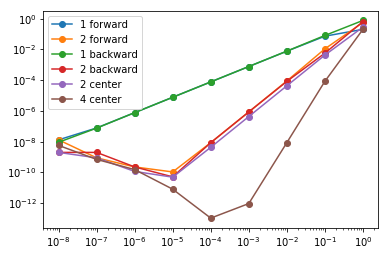

In [29]:
def p3(x0):
    f = lambda x: (np.sin(x) + 1) ** np.sin(np.cos(x))
    deriv = get_prime()(x0)
    h = np.logspace(-8, 0, 9)
    error1 = abs(deriv - forward1(f, x0, h))
    error2 = abs(deriv - forward2(f, x0, h))
    error3 = abs(deriv - backward1(f, x0, h))
    error4 = abs(deriv - backward2(f, x0, h))
    error5 = abs(deriv - center1(f, x0, h))
    error6 = abs(deriv - center2(f, x0, h))
    
    return error1, error2, error3, error4, error5, error6


mat1 = np.zeros(9)
mat2 = np.zeros(9)
mat3 = np.zeros(9)
mat4 = np.zeros(9)
mat5 = np.zeros(9)
mat6 = np.zeros(9)

mat1 = p3(1)[0]
mat2 = p3(1)[1]
mat3 = p3(1)[2]
mat4 = p3(1)[3]
mat5 = p3(1)[4]
mat6 = p3(1)[5]    
plt.loglog(np.logspace(-8, 0, 9), mat1,label = '1 forward', marker ='o')
plt.loglog(np.logspace(-8, 0, 9), mat2,label = '2 forward',  marker ='o')
plt.loglog(np.logspace(-8, 0, 9), mat3,label = '1 backward',  marker ='o')
plt.loglog(np.logspace(-8, 0, 9), mat4,label = '2 backward',  marker ='o')
plt.loglog(np.logspace(-8, 0, 9), mat5,label = '2 center',  marker ='o')
plt.loglog(np.logspace(-8, 0, 9), mat6,label = '4 center',  marker ='o')
plt.legend()
plt.show()

# Problem 4

In [34]:
data = np.load('plane.npy')
a=500
t = data[:, 0]
alpha = data[:, 1]
beta = data[:, 2]
alpha = np.deg2rad(alpha)
beta = np.deg2rad(beta)
t

array([ 7.,  8.,  9., 10., 11., 12., 13., 14.])

In [36]:
x = a * (np.tan(beta))/(np.tan(beta) - np.tan(alpha))
y = a * (np.tan(beta) * np.tan(alpha))/(np.tan(beta) - np.tan(alpha))
dx=np.zeros(len(t))
dy=np.zeros(len(t))
#forward approx

dx[0]=x[1]-x[0]
dy[0]=y[1]-y[0]
#centered approx
for i in range (1,7):
    dx[i]=(x[i+1]-x[i-1])/2
    dy[i]=(y[i+1]-y[i-1])/2
#backward approx
dx[7]=x[7]-x[6]
dy[7]=y[7]-y[6]


print((dx ** 2 + dy ** 2) ** .5)

[46.42420062 47.00103938 48.99880514 50.09944163 48.29035084 51.56455905
 53.92303355 51.51480057]


# Problem 5

In [37]:
def jacobian(f, x, h):
    n = np.shape(x)[0]
    m = np.shape(f)[0]
    mat = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            I = np.eye(n)
            mat[i,j] = (f(x + h * I[:, j])[i] - f(x + h * I[:, j])[i])/(2 * h)  
    return mat

# Problem 6

In [57]:
from autograd import grad
import autograd.numpy as anp
import time
import sympy as sy

x = sy.symbols('x')
f = sy.log(sy.sqrt(sy.sin(sy.sqrt(x))))
x0 = np.pi/4
h=1e-5


In [59]:
#sympy deriv
start = time.time()
sy = sy.diff(f, x)
sy1 = lambdify(x, sy,'numpy')
print(sy1(x0))
end = time.time()
print('time: '+ str(end - start))

0
time: 0.001302957534790039


In [60]:
#autograd
f1 = lambda x: anp.log(anp.sqrt(anp.sin(anp.sqrt(x))))
start = time.time()
grad_f = grad(f1)
print(grad_f(x0))
end = time.time()
print('time: '+ str(end - start))

0.23025901114696085
time: 0.0011188983917236328


In [61]:
#second order centered diff quotient
f2 = lambda x: np.log(np.sqrt(np.sin(np.sqrt(x))))
start = time.time()
deriv=(f2(x0-2*h)-8*f2(x0-h)+8*f2(x0+h)-f2(x0+2*h))/12*h
print(deriv)
end = time.time()
print('time: '+ str(end - start))


2.3025901114276384e-11
time: 0.0006151199340820312


# Problem 7

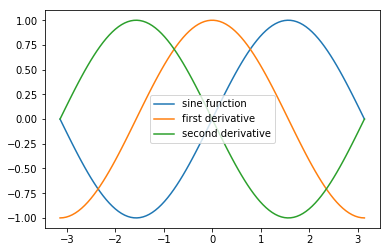

In [65]:
import math
def taylor_sin(x, tol=1e-5):
    result = 0
    cur_term = x
    i = 0
    while anp.abs(cur_term) >= tol:
        cur_term = ((-1) ** (i)) * x ** (2 * i + 1)/np.math.factorial(2 * i + 1)
        result += cur_term
        i += 1
    return result

d_taylor_sin = grad(taylor_sin)
d2 = grad(d_taylor_sin)
x = np.linspace(-np.pi, np.pi, 100)
plt.plot(x, np.sin(x), label ='sine function')
plt.plot(x, [d_taylor_sin(x) for x in x], label = 'first derivative')
plt.plot(x, [d2(x) for x in x], label = 'second derivative')
plt.legend()
plt.show()

# Problem 8

In [66]:
import sympy as sy
from autograd import jacobian

x, y = sy.symbols('x y')
f1 = sy.exp(x) * sy.sin(y) + y ** 3
f2 = 3 * y - sy.cos(x)
x0 = 1
y0 = 1
h = 1e-5

In [67]:
start1 = time.time()
J1 = np.zeros((2, 2))

sy11 = sy.diff(f1, x)
s11 = lambdify((x,y), sy11,'numpy')
sy12 = sy.diff(f1, y)
s12 = lambdify((x,y), sy12,'numpy')
sy21 = sy.diff(f2, x)
s21 = lambdify((x,y), sy21,'numpy')
sy22 = sy.diff(f2, y)
s22 = lambdify((x,y), sy22,'numpy')

J1[0, 0] = s11(x0, y0)
J1[0, 1] = s12(x0, y0)
J1[1, 0] = s21(x0, y0)
J1[1, 1] = s22(x0, y0)
print(J1)
end1 = time.time()
print('time: '+ str(end1 - start1))


[[2.28735529 4.46869394]
 [0.84147098 3.        ]]
time: 0.0221560001373291


In [69]:
J2 = np.zeros((2,2))
start2 = time.time()
f1 = lambda x,y: np.exp(x) * np.sin(y) + y ** 3
f2 = lambda x,y: 3 * y - np.cos(x)
J2[0,0] = (f1(x0+h, y0) - f1(x0-h, y0))/(2 * h)
J2[0,1] = (f1(x0, y0+h) - f1(x0, y0-h))/(2 * h)
J2[1,0] = (f2(x0+h, y0) - f2(x0-h, y0))/(2 * h)
J2[1,1] = (f2(x0, y0+h) - f2(x0, y0-h))/(2 * h)
print(J2)
end2 = time.time()
print('time: ' + str(end2- start2))



[[2.28735529 4.46869394]
 [0.84147098 3.        ]]
time: 0.0016179084777832031


In [70]:
start3 = time.time()
f = lambda x: anp.array([anp.exp(x[0]) * anp.sin(x[1]) + x[1] ** 3, 3 * x[1]-anp.cos(x[0])])
jacobian_f = jacobian(f)
J3 = jacobian_f(anp.array([1.,1.]))
print(J3)
end3 = time.time()
print('time: '+ str(end3 - start3))

[[2.28735529 4.46869394]
 [0.84147098 3.        ]]
time: 0.00405120849609375
